# CovidAnalysis
Using the latest Covid-19 data to plot interesting historical graphs to help us understand the pandemic in the US

First we load in the classes and modules we will need. The CovidAnalysis module defines two classes:
* CovidTracking
* CovidVac
which get their data from one of the JHU websites and then cache it in a json file locally.

The VectorAlgebra module has operations on lists of numbers (which represent graphs over date ranges)

The States module has functions and variables related to US states and their populations.


In [1]:
import matplotlib.pyplot as plt
import csv

from CovidAnalysis import *
from C19Plotting import *

import VectorAlgebra as VA
import States
import datetime
print(datetime.datetime.now())

2021-01-05 16:41:56.370819


Next we load in the two data sets
* data.us_covid_data = the JHU covid-19 data
* data.us_vac_data = the JHU covid vaccination data

In [2]:
#data = CovidTracking(use_cached_data=True)
data = CovidTracking(use_cached_data=False)
print(data.us_covid_data[0]['date'])
print(data.us_vac_data[0]['date'])

20210104
20201214


## Getting and plotting data 

data.getStateData(state,field,first,last) 
will generate the list of values for that field and state in the date range

data.getStateVacData(state,field,first,last)
does the same but with the vaccination data

data.us_vac_data is the list of dictionaries of vacination data
data.us_covid_data is the list of dictionaries of covid19 data



In [3]:
print('MA new deaths from 12/15 to 1/1/21\n',data.getStateData('MA','death',20201215,20210101))
print()
print('Vaccination data - sample dictionary\n',data.us_vac_data[-1])
print()
print('dictionary of date:totalvaccinations\n',{x['date']:data._getField(x,'people_total')  for x in data.us_vac_data if x['stabbr'] == 'MA' })
print()
print('vaccination data for MA from 12/15/20 to 1/4/21\n',data.getStateVacData('MA','people_total',20201215,20210105))
print('dates with no value simply carry over the last value')

MA new deaths from 12/15 to 1/1/21
 [11443, 11513, 11558, 11610, 11657, 11717, 11759, 11804, 11887, 11963, 11963, 12010, 12110, 12158, 12218, 12338, 12423, 12423]

Vaccination data - sample dictionary
 {'date': 20210104, 'Province_State': 'Wyoming', 'stabbr': 'WY', 'dashboard_available': 'Yes', 'doses_alloc_total': '', 'doses_alloc_moderna': '', 'doses_alloc_pfizer': '', 'doses_alloc_unknown': '', 'doses_shipped_total': '26950', 'doses_shipped_moderna': '13300', 'doses_shipped_pfizer': '13650', 'doses_shipped_unknown': '', 'doses_admin_total': '8383', 'doses_admin_moderna': '', 'doses_admin_pfizer': '', 'doses_admin_unknown': '8383', 'people_total': '', 'people_total_2nd_dose': '', 'oldDate': '01/04/2021'}

dictionary of date:totalvaccinations
 {20201214: '', 20201215: '94', 20201216: '3277', 20201217: '9853', 20201218: '18642', 20201219: '22609', 20201220: '28488', 20201221: '37400', 20201222: '46053', 20201223: '55897', 20201224: '59556', 20201225: '59847', 20201226: '62361', 2020122

# Plotting the Vaccination and Covid Data
Here we give an example of plotting the vaccination and covid positive data and their sum over an interval. This gives an estimate of our distances from herd immunity (if you know the state population).

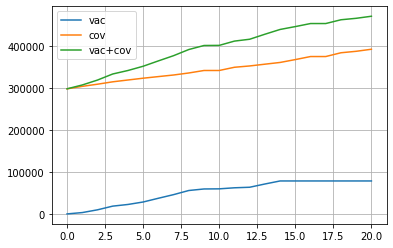

In [4]:

v = data.getStateVacData('MA','people_total',20201215,20210104)
c = data.getStateData(   'MA',    'positive',20201215,20210104)
plt.plot(v,label="vac")
plt.plot(c,label="cov")
plt.plot(VA.addLists([v,c]),label="vac+cov")
plt.legend()
plt.grid()

# Path to Herd Immunity in the US
Here we create a plot which shows the path to herd immunity at two vaccination rates (1M/day and 2M/day)

'done'

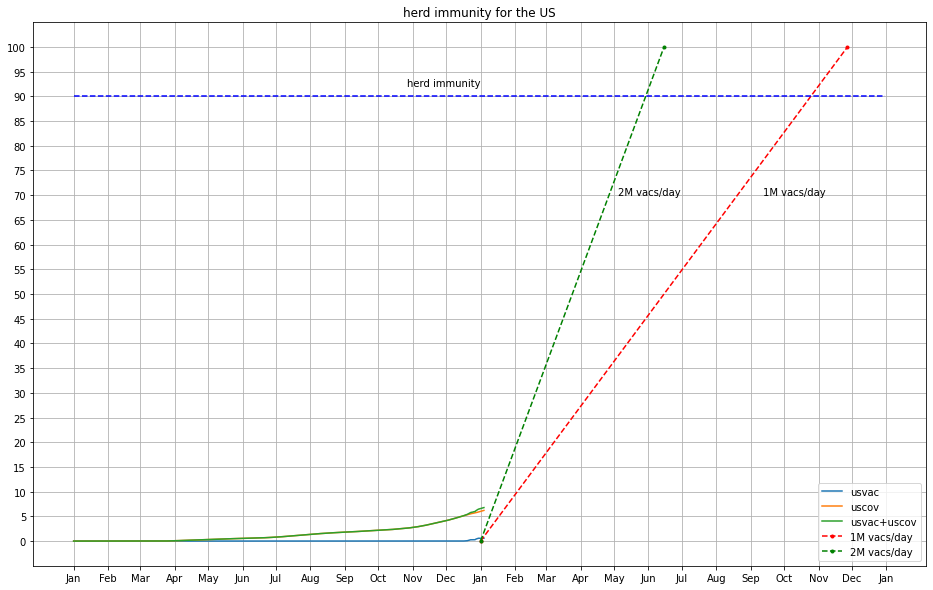

In [14]:
plt.rcParams['figure.figsize'] = [16,10]
first = 20200101
last  = 20210104
d=100
dr = data.genDateRange(first,last)
state = 'SD'
oneState = False
if oneState:
    v = VA.scale(d/States.statePop(state),data.getStateVacData(state,'people_total',first,last))
    c = VA.scale(d/States.statePop(state),data.getStateData(   state,    'positive',first,last))
    vc = VA.addLists([v,c])
    plt.plot(v,label="vac")
    plt.plot(c,label="cov")
    plt.plot(vc,label="vac+cov")
    plt.title('herd immunity for '+str(state))
else:
    usvac = VA.scale(d/330000000,data.getUSVacData('people_total',first,last))
    uscov = VA.scale(d/330000000,data.getUSData('positive',first,last))
    usvc = VA.addLists([usvac,uscov])
    plt.plot(usvac,label="usvac")
    plt.plot(uscov,label="uscov")
    plt.plot(usvc,label="usvac+uscov")
    plt.title('herd immunity for the US')

plt.plot([366,366+330],[0,100],'.--r',label="1M vacs/day")
plt.plot([366,366+330/2],[0,100],'.--g',label="2M vacs/day")
plt.text(490,70,'2M vacs/day')
plt.text(620,70,'1M vacs/day')
plt.plot([0,365*2],[90,90],'--b')
plt.text(300,92,'herd immunity')
plt.legend()
plt.grid()
xticks(data.genDateRange(first,20220101))
plt.yticks(list(range(0,101,5)))
#xticks(data.genDateRange(first,20220101))
#plt.yticks(list(range(0,330000000,10000000)))

'done'

# moderna vs pfizer
Here we compare modern and pfizer shipments in the US by date

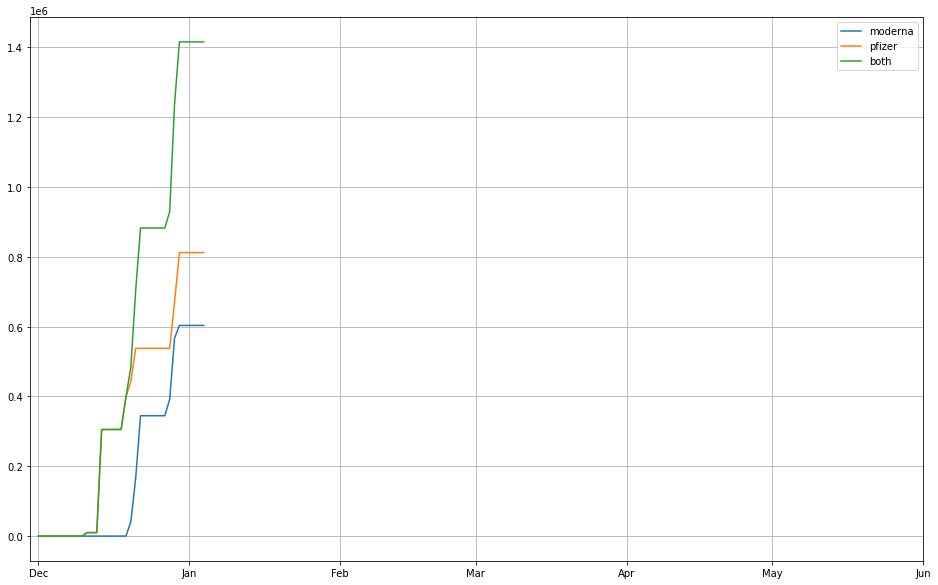

In [6]:
first=20201201
last=20210104
mod = data.getUSVacData('doses_shipped_moderna',first,last)
pfi = data.getUSVacData('doses_shipped_pfizer',first,last)
all = VA.addLists([mod,pfi])
plt.plot(mod,label="moderna")
plt.plot(pfi,label="pfizer")
plt.plot(all,label="both")
xticks(data.genDateRange(first,20210601))
#plt.yticks(list(range(0,330000000,10000000)))
plt.grid()
plt.legend()
#plt.yscale('log')
#data.us_vac_data[201]

# Vaccination data by state
Here we plot a big table of graphs showing the vaccination progress in each state

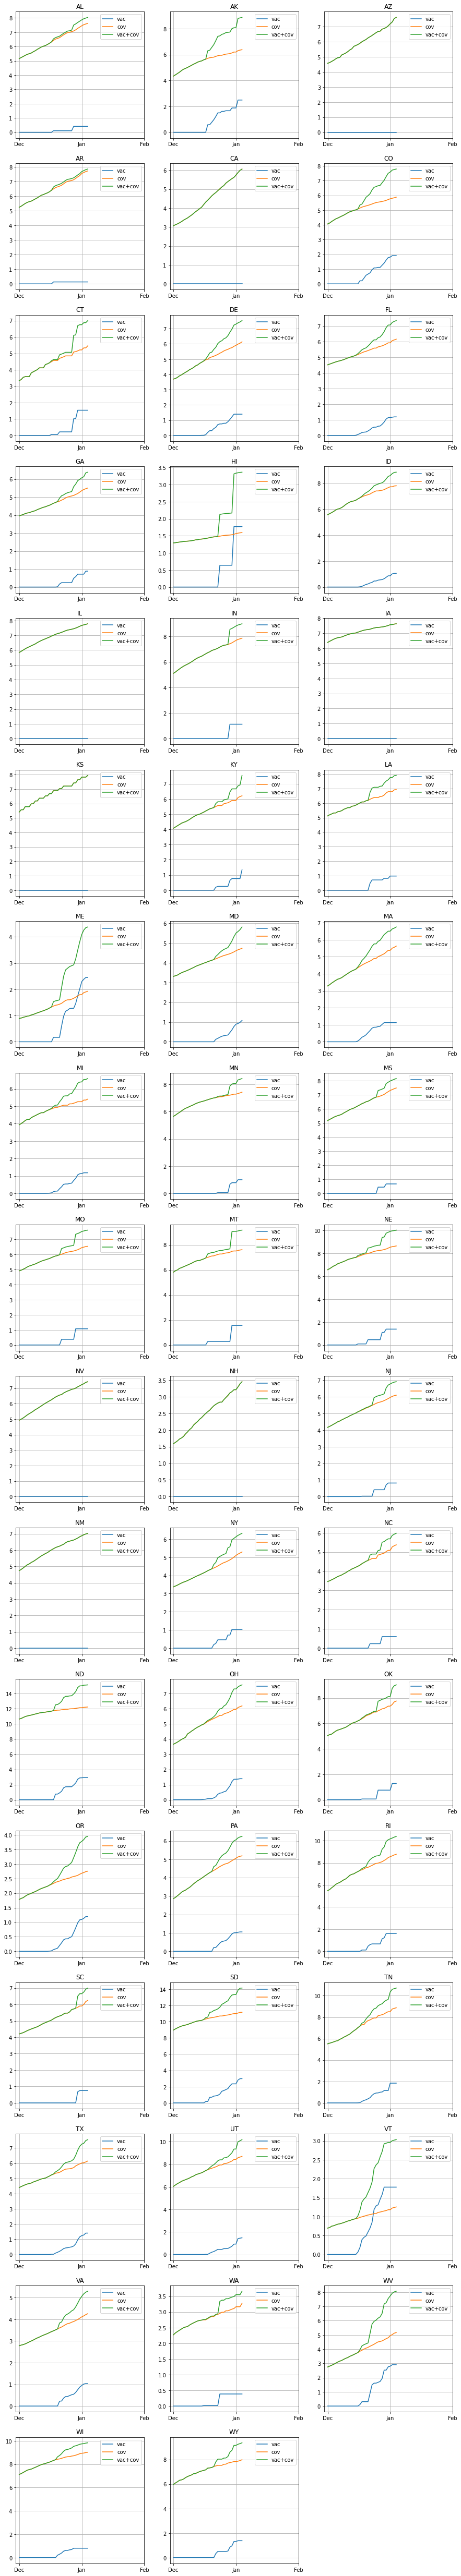

In [7]:
def plotVacData(state):
    first = 20201201
    last  = 20210104
    v = VA.scale(100/States.statePop(state), data.getStateVacData(state,'people_total',first,last))
    c = VA.scale(100/States.statePop(state), data.getStateData(   state,    'positive',first,last))
    plt.plot(v,label="vac")
    plt.plot(c,label="cov")
    plt.plot(VA.addLists([v,c]),label="vac+cov")
    plt.legend()
    plt.title(state)
    xticks(data.genDateRange(first,20210201))
    plt.grid()

plt.rcParams['figure.figsize'] = [15,90]
r=0
c=1
sa = list(States.stateNames.keys())
#print(sa)

for state in sa:
    plt.subplot(17,3,r+1)
    plotVacData(state)
    r = r+1
